

Group Id : 15

Group Members :

    Manas Patil     (33355)
    Niranjan Patil  (33356)
    Swapnil Patil   (33358)
    Jayesh Prajapat (33360)


#ABOUT THE DATASET

**This dataset can be used for analysis of suisides that took place in India during the time period of 2001-2012**

**Context**

This data set contains yearly suicide detail of all the states/u.t of India by various parameters from 2001 to 2012.
Content

Time Period: 2001 - 2012
Granularity: Yearly
Location: States and U.T's of India

**Parameters:**

a) Suicide causes

b) Education status

c) By means adopted

d) Professional profile

e) Social status

**Columns:**

1. State
2. Year
3. Type_code
4. Type
5. Gender
6. Age_Group
7. Total



# MOUNTING DATASET AND ADDING REQUIRED LIBRARIES


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv('Suicides_in_India_2001-2012.csv')

# PRE-PROCESSING THE DATA AVAILABLE

In [0]:
#SIZE OF DATA:
print("Available data size (rows,columns):")
data.shape

Available data size (rows,columns):


(237519, 7)

**Display The Dataset:**

In [0]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


**Random Sample of data**

In [0]:
data.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
73095,Goa,2010,Professional_Profile,Professional Activity,Female,60+,0
82082,Haryana,2002,Professional_Profile,Service (Private),Male,15-29,66
71074,Goa,2007,Causes,Dowry Dispute,Male,45-59,0
98336,Jammu & Kashmir,2007,Means_adopted,By Consuming Insecticides,Male,30-44,3
221837,Uttar Pradesh,2009,Causes,Other Causes (Please Specity),Female,30-44,34
63981,Delhi (Ut),2006,Professional_Profile,Professional Activity,Male,0-14,0
162849,Nagaland,2002,Causes,Insanity/Mental Illness,Male,30-44,0
72656,Goa,2010,Causes,Failure in Examination,Male,15-29,5
168975,Odisha,2001,Causes,Failure in Examination,Female,30-44,5
111851,Karnataka,2007,Means_adopted,By coming under running vehicles/trains,Female,15-29,15


**Some information about Data**

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


**Checking Dataset For Missing values**

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


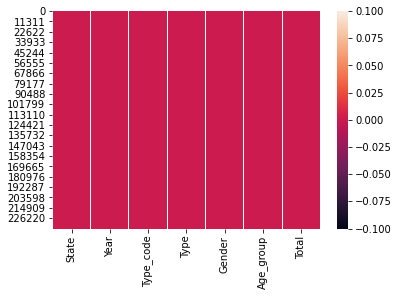

In [0]:
print(data.isna().sum())

sns.heatmap(data.isna())

**WE CAN SEE FROM ABOVE RESULT THAT THERE ARE NO MISSING VALUES IN THE DATASET**

# ANALYSIS AND VISUALIZATIONS

**SUICIDES RATE OVER YEARS**

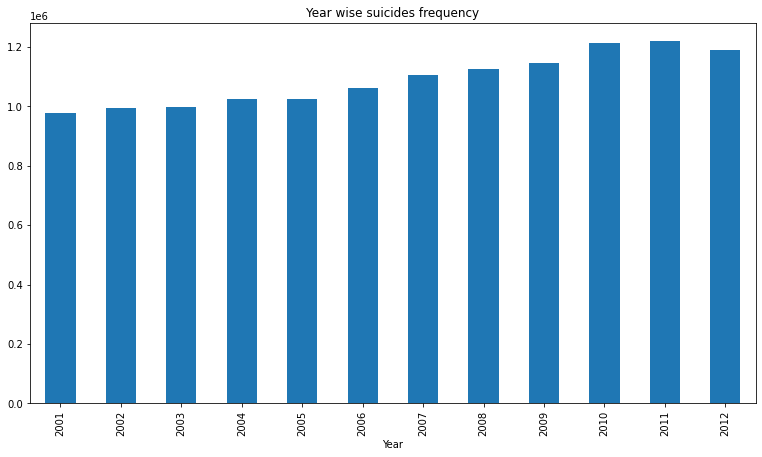

In [0]:
data.groupby('Year').sum()['Total'].plot(kind='bar',figsize=(13,7),title ="Year wise suicides frequency");

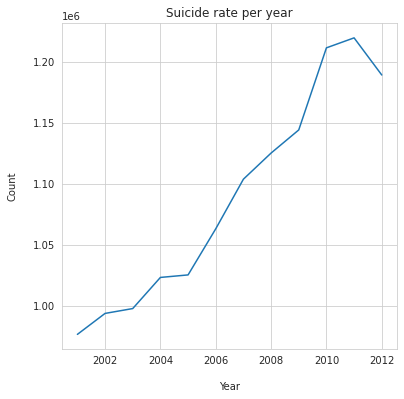

In [0]:
#LINE CHART
year = data.groupby('Year').sum()['Total'].plot(kind='line', figsize=(6,6), title = 'Suicide rate per year');
year.set_xlabel('\nYear')
year.set_ylabel('Count\n')
sns.set_style('whitegrid');

**Gender wise suicides frequency**

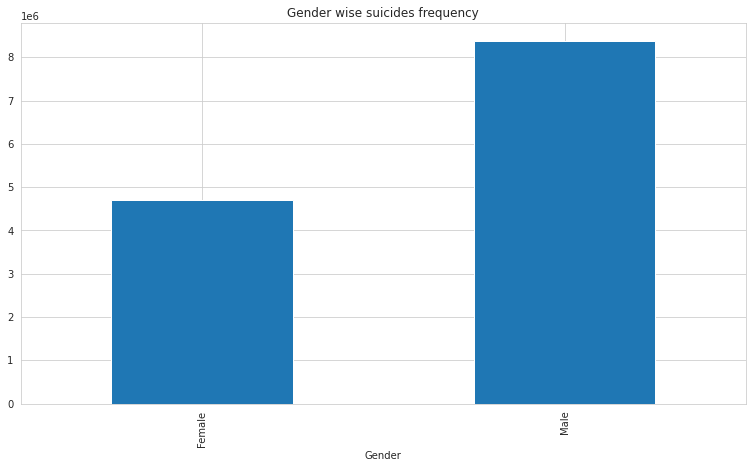

In [0]:
data.groupby('Gender').sum()['Total'].plot(kind="bar",figsize=(13,7),title ="Gender wise suicides frequency");

**Relation between the columns Type_code and Type**

The Type_code column is closely related with the Type column.

There are 5 type-codes to which the type value is corelated and then the statistical data is provided.

In [0]:
data.Type_code.unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

We can sagregate the data based on type codes.

This will help us in visualizing the data more properly.

**Putting the data in multiple data-frames based on type codes:**

In [0]:
#Education_Status
edudata=data[data['Type_code']=='Education_Status']
#Causes
causedata=data[data['Type_code']=='Causes']
#Means_adopted
meansdata=data[data['Type_code']=='Means_adopted']
#Professional_Profile
profdata=data[data['Type_code']=='Professional_Profile']
#Social_Status
socialdata=data[data['Type_code']=='Social_Status']

More refining the new dataframes with respect to other attributes:

In [0]:
edudata=edudata[['Type','Gender','Total']]
eduSort=edudata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

causedata=causedata[['Type','Gender','Total']]
causeSort=causedata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

meansdata=meansdata[['Type','Gender','Total']]
meansSort=meansdata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

profdata=profdata[['Type','Gender','Total']]
profSort=profdata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

socialdata=socialdata[['Type','Gender','Total']]
socialSort=socialdata.groupby(['Type','Gender'],as_index=False).sum().sort_values('Total',ascending=False)

**Analysis of new data frames**

Educational background  vs  Total suicides  vs Gender


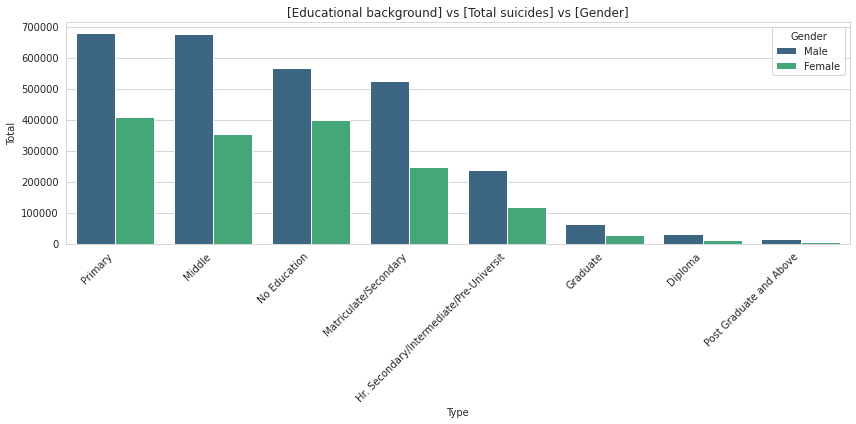

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=eduSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Educational background] vs [Total suicides] vs [Gender]')
plt.tight_layout()

Causes of suicide  vs  Total suicides  vs Gender


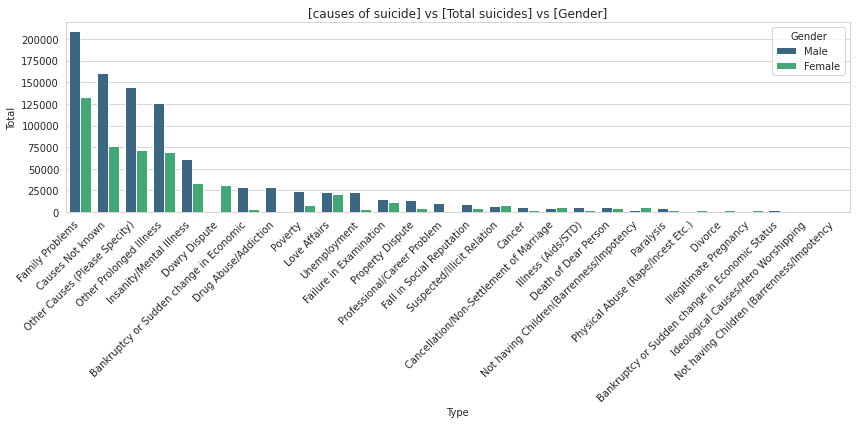

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=causeSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[causes of suicide] vs [Total suicides] vs [Gender]')
plt.tight_layout()

Professinal Status  vs  Total suicides  vs Gender

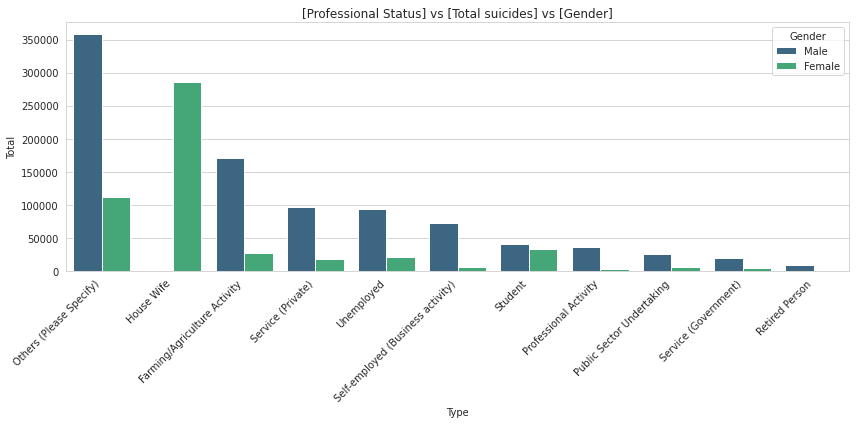

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=profSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Professional Status] vs [Total suicides] vs [Gender]')
plt.tight_layout()

Social Status  vs  Total suicides  vs Gender

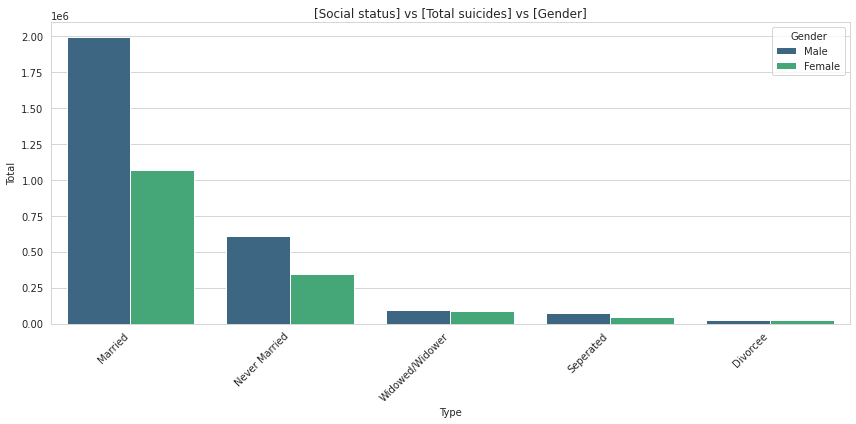

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type',y='Total',hue='Gender',data=socialSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Social status] vs [Total suicides] vs [Gender]')
plt.tight_layout()

Means of Suicide  vs  Total suicides  vs Gender

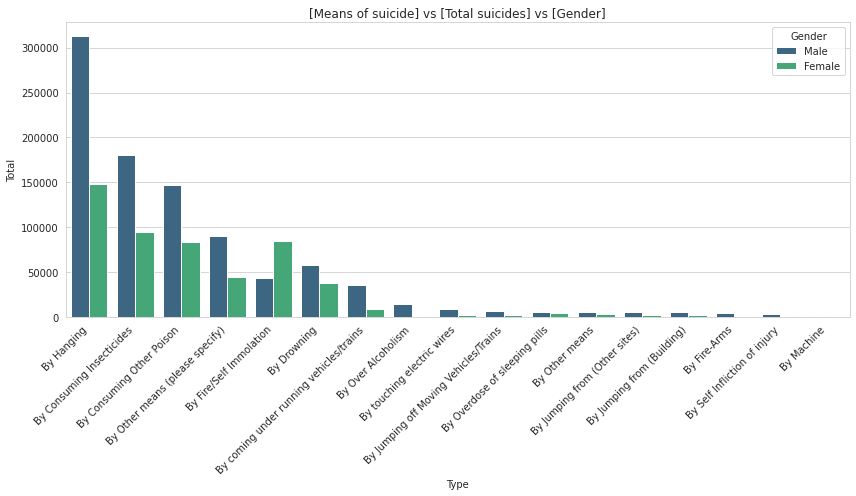

In [0]:
plt.figure(figsize=(12,7))
sns.barplot(x='Type',y='Total',hue='Gender',data=meansSort,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.title('[Means of suicide] vs [Total suicides] vs [Gender]')
plt.tight_layout()

Suicides due to addictions

Text(0.5, 0, 'Total number of suicides')

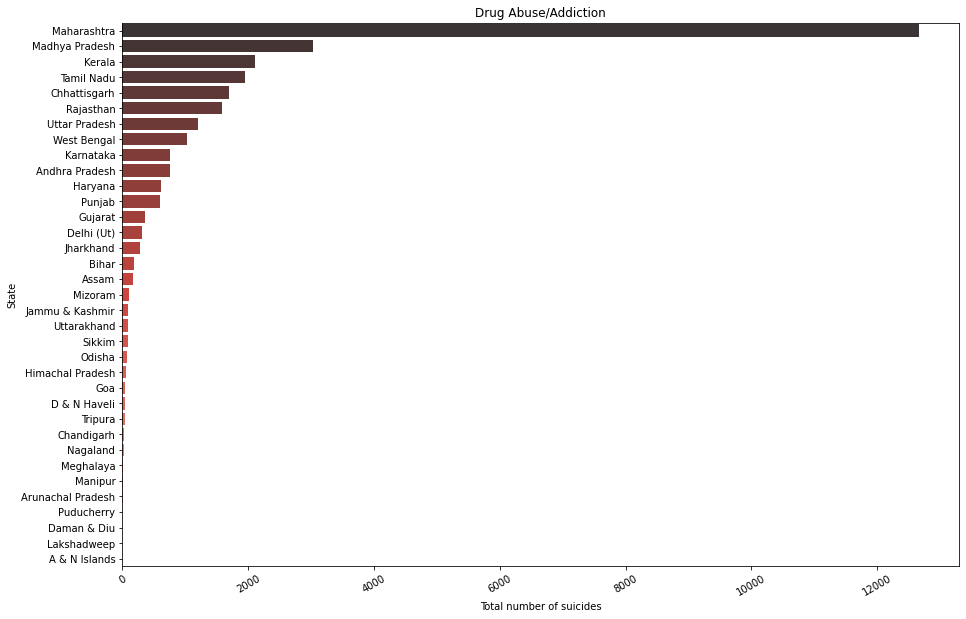

In [0]:
data1 = data.loc[(data.Type == 'Drug Abuse/Addiction')].groupby(['State'])['Total'].sum().reset_index().sort_values('Total',ascending=False).head(60)
data1.set_index(['State'])
data1=data1.set_index(['State'])
plt.subplots(figsize=(15,10))
g = sns.barplot(x='Total',y=data1.index,data=data1,palette="Reds_d",).set_title('Drug Abuse/Addiction')
plt.xticks(rotation=30)
plt.xlabel('Total number of suicides')

State vs age group vs total suicides

In [0]:
causes=data[data['Type_code']=='Causes']
causeGrp=causes.groupby(['State','Age_group'],as_index=False).sum()
causeGprpvt=causeGrp.pivot(index='Age_group',columns='State',values='Total')

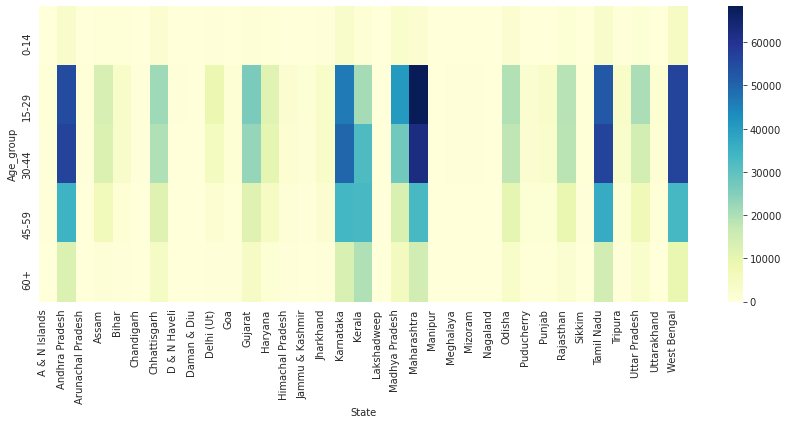

In [0]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causeGprpvt,cmap="YlGnBu")
plt.tight_layout()

**State wise total suicides per cause**

In [0]:
causesType=data[data['Type_code']=='Causes']
causeTypeGrp=causesType.groupby(['State','Type'],as_index=False).sum()
causeTypeGprpvt=causeTypeGrp.pivot(index='State',columns='Type',values='Total')

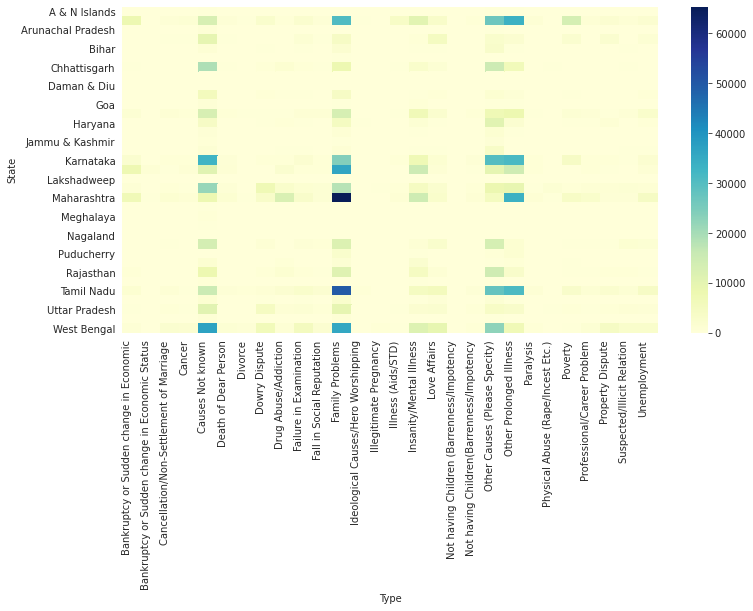

In [0]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45,ha='right')
sns.heatmap(causeTypeGprpvt,cmap="YlGnBu")

We can observe by the graph above that most suicides occur due to **family problems**


# **Conclusion**


*   Age group between **15-44** has the highest number of suicides.
*    **Maharashtra, West Bengal and Tamil Nadu** have the highest suicide rate this might also be because of the high population in these states.
*    **Family Problems, Illness, Mental Illness** are some of the main reason while most of the reasons are still unknown.
*    **Hanging, Consuming Insecticides** is more common but, most of other means are unknown.
*    Most of the **professional profile** is unknown but **house wife** comes in second, while **Farming** comes in at third.
*    The reason for suicide at the age group between **0-14** is because of **Failure in Examination.**


    

